In [1]:
from fairness.matching import compute
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fairness.pre_processing import categorical_to_numeric_converter
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost import cv
import xgboost as xgb

In [2]:
dataset = pd.read_csv('./dataset/adult.data', sep=',')

In [3]:
dataset = categorical_to_numeric_converter(dataset)

In [4]:
dataset.rename(columns={" <=50K": "50K"}, inplace=True)

In [5]:
output_column = "50K"

In [6]:
X = dataset.iloc[:,:len(dataset.columns) - 2]
y = dataset.loc[:, output_column:]

In [7]:
estimator = xgb.XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [8]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [11]:
grid_search_classifier = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [12]:
y_pred = grid_search_classifier.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4583  329]
 [ 565 1035]]
0.8627149877149877
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4912
           1       0.76      0.65      0.70      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.79      0.80      6512
weighted avg       0.86      0.86      0.86      6512



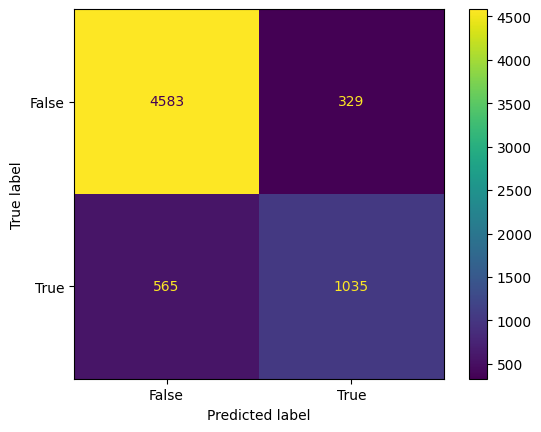

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()